In [7]:
pip install adjustText


Note: you may need to restart the kernel to use updated packages.


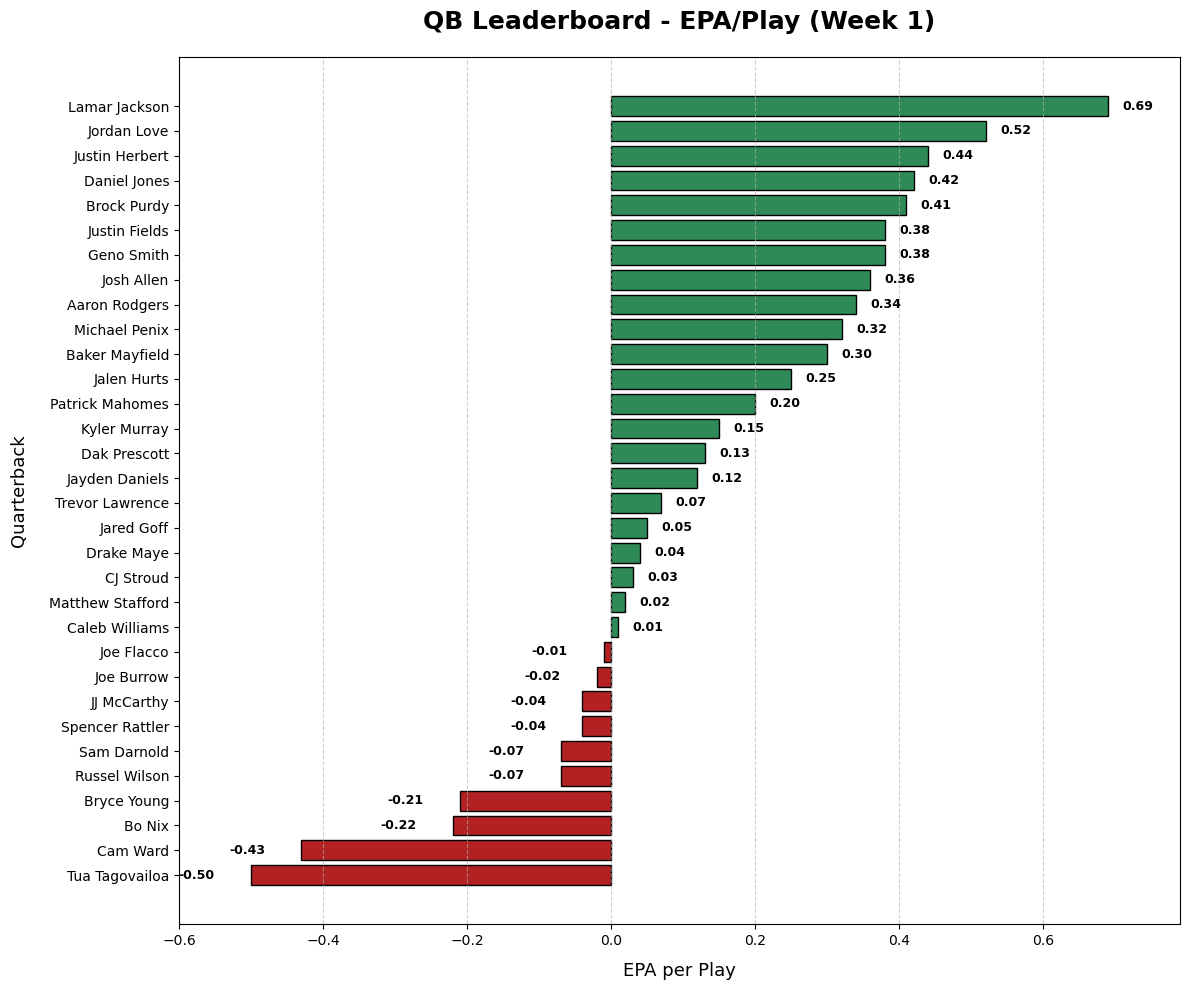

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel file
file_path = "Downloads/NFL_Stats.xlsm"
df = pd.read_excel(file_path, sheet_name="Week 1")

# Create leaderboard
leaderboard = df[["QB", "EPA/Play"]].sort_values(by="EPA/Play", ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 10))  # wider chart

# Color bars: green for positive EPA, red for negative
colors = ["seagreen" if val >= 0 else "firebrick" for val in leaderboard["EPA/Play"]]

bars = plt.barh(leaderboard["QB"], leaderboard["EPA/Play"], color=colors, edgecolor="black")

# Flip y-axis so top performer is on top
plt.gca().invert_yaxis()

# Titles and labels
plt.title("QB Leaderboard - EPA/Play (Week 1)", fontsize=18, weight="bold", pad=20)
plt.xlabel("EPA per Play", fontsize=13, labelpad=10)
plt.ylabel("Quarterback", fontsize=13, labelpad=15)

# Gridlines for readability
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Force x-axis limits so negatives extend to -0.6
plt.xlim(-0.6, leaderboard["EPA/Play"].max() + 0.1)

# Value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.02 if width >= 0 else -0.05),  # spacing for labels
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}",
        va="center",
        ha="left" if width >= 0 else "right",
        fontsize=9,
        weight="bold"
    )

image_path = "Downloads/qb_EPA_plot.png"  # You can change the file name and format
plt.savefig(image_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

